## | CSMA Junior | Practical session on "Coupled systems"|

#### Modeling of a beam coupled to its electrical analogue through an array of piezoelectric patches

References:  
*- Lossouarn, B., Kerschen, G., & Deü, J. F. (2021). An analogue twin for piezoelectric vibration damping of multiple nonlinear resonances. Journal of Sound and Vibration, 511, 116323.*  
*- Lossouarn, B., Aucejo, M., & Deü, J. F. (2018). Electromechanical wave finite element method for interconnected piezoelectric waveguides. Computers & Structures, 199, 46-56.*

The following code is open source and intended for educational and scientific purposes only.

Disclaimer:  
The authors reserve all rights but do not guarantee that the code is free from errors. Furthermore, the authors shall not be liable in any event caused by the use of the program.  

Contact : boris.lossouarn@lecnam.net

## Mechanical beam

<p align="center">
<img src="media/mechanical_beam.png" style="width:900px"></img>
</p>


#### Dimensions and mechanical properties for the beam and the piezoelectric patches

|                       | Beam (Steel)                                                      | Patches (PZT 5A)                                                                                         |
|-----------------------|-------------------------------------------------------------------|----------------------------------------------------------------------------------------------------------|
| Length                | $l_{ 	\rm{b}} = 700$ mm                                         | $l_{ \textrm{p}}=67$ mm                                                                                  |
| Width                 | $b=14$ mm                                                         | $b=14$ mm                                                                                                |
| Thickness             | $h_{ \textrm{b}}=14$ mm                                           | $h_{ \textrm{p}}=2$ mm                                                                                   |
| Second moment of area | $I_{ \textrm{b}} = \frac{b h_{ \textrm{b}}^3}{12} = 3201 $ mm$^4$ | $I_{ \textrm{p}} = \frac{b( (h_{ \textrm{b}}+2h_{ \textrm{p}})^3-h_{ \textrm{b}}^3)}{24} = 1801 $ mm$^4$ |
| Density               | $\rho_{ \textrm{b}}=7850$ kg/$\textrm{m}^3$                       | $\rho_{ \textrm{p}}=7800$ kg/$\textrm{m}^3$                                                              |
| Young's modulus       | $Y_{ \textrm{b}} = 210$ GPa                                       | $Y_{ \textrm{p}}^E= 66$ GPa                                                                              |

In [ ]:
%--------------- Geometric constants --------------------------------------

l_b = 0.7;          % length of the beam
b = 0.014;          % width of the beam
h_b = 0.014;        % thickness of the beam

l_p = 0.067;        % length of a portion with piezo
h_p = 0.002;        % thickness of a piezo

I_b=b*(h_b^3)/12;   % second moment of area of the structure 
I_p=b*((h_b+2*h_p)^3-h_b^3)/12/2;  % second moment of area for one piezo

%--------------- Material constants ---------------------------------------

rho_b = 7850;             % density of the main structure  
Y_b = 210*10^9;           % Young modulus of the main structure 

rho_p = 7800;             % density of the piezo 
Y_p_E = 66e9;             % elastic stiffness of the piezo at constant electric field


#### Homogenized properties

The homogenized flexural rigidity $Y I$ is obtained from the **bending compliance of a unit cell** : 
$$
\frac{a}{YI} = \frac{l_{ \textrm{p}}}{Y_{ \textrm{b}} I_{ \textrm{b}}  + 2 Y^E_{ \textrm{p}} I_{ \textrm{p}} }+\frac{a-l_{ \textrm{p}}}{Y_{ \textrm{b}} I_{ \textrm{b}}},
$$
where $a$ is the lenght of the unit cell.

The homogenized linear density $\rho S$ is obtained from the **mass of a unit cell** :
$$
\rho S a = \rho_{ \textrm{b}} h_{ \textrm{b}} b a + 2 \rho_{ \textrm{p}} h_{ \textrm{p}} b l_{ \textrm{p}}.
$$

In [ ]:
n = 10;               % number of unit cells
a = l_b/n;            % length of a unit cell 
l_p_modif = l_p*10/n; % length of the piezo patches when n is not equal to 10 

YI_E =a/(l_p_modif/(Y_b*I_b+2*Y_p_E*I_p)+(a-l_p_modif)/(Y_b*I_b));   % homogenized Young modulus*I 
rhoS = (rho_b*b*h_b*a+2*rho_p*b*h_p*l_p_modif)/a;                    % homogenized linear density rho*S

#### FEM stiffness and mass matrices

The mechanical displacement vector for an Euler-Bernoulli beam element is defined as 
$\mathbf{q_m} =
\left[ 
\begin{array}{cccc}
 {W}_\textrm{L} &  {\theta}_\textrm{L} &  {W}_\textrm{R} & {\theta}_\textrm{R}
\end{array} \right]^T$, where $\textrm{W}$ refers to the transverse displacement, ${\theta}$ refers to the angular displacement and the letters $\textrm{L}$ and $\textrm{R}$ correspond to the left and right sides of the element. 

A finite element model based on cubic shape functions for the transverse displacement involves the **stiffness matrix**  
$$
\mathbf{K_m}
=
\dfrac{Y I}{a^3} \left[ 
%\setlength\arraycolsep{2pt}
\begin{array}{cccc}
 12 & 6 a & -12 & 6 a\\
 6 a & 4 a^2 & -6 a & 2 a^2\\
 -12 & -6 a & 12 & -6 a\\
 6 a & 2 a^2 & -6 a & 4 a^2
\end{array} \right],
$$
and the **mass matrix**
$$
\mathbf{M_m}
=
\dfrac{\rho S a}{420} \left[ \begin{array}{cccc}
  156 & 22 a & 54 & -13 a\\
  22 a & 4 a^2 & 13 a & -3 a^2 \\
  54 & 13 a & 156 & -22 a \\
 -13 a & -3 a^2 & -22 a & 4 a^2
\end{array} \right].
$$
Note that the lenght of the element is here equal to $a$, the lenght of the unit cell.

In [ ]:
Le=a; % lenght of the element

Km=...
YI_E/(Le^3)*[12,   6*Le,   -12,   6*Le;...
            6*Le, 4*Le^2, -6*Le, 2*Le^2;...
            -12,  -6*Le, 12,  -6*Le;...
            6*Le, 2*Le^2, -6*Le, 4*Le^2];      % mechanical stiffness matrix      


Mm=...
rhoS*Le/420*[ 156,   22*Le, 54,  -13*Le;...
            22*Le,  4*Le^2,   13*Le, -3*Le^2;...
            54,   13*Le,    156,  -22*Le;...
            -13*Le, -3*Le^2,  -22*Le,  4*Le^2]; % mechanical mass matrix     

#### Mechanical frequencies and mode shapes

The **eigenproperties** of the mechanical beam can be computed after assembly of the global stiffness and mass matrices:
$$
\left[
\mathbf{K_{tot}} - \omega^ 2 \mathbf{M_{tot}}  
\right]  
\mathbf{q_{tot}} 
=
\mathbf{0}.
$$

#### *STEP #1: Compute the first three natural frequencies and mode shapes of the mechanical beam for various boundary conditions.*

freq_123 =

    24.445
   153.196
   429.050



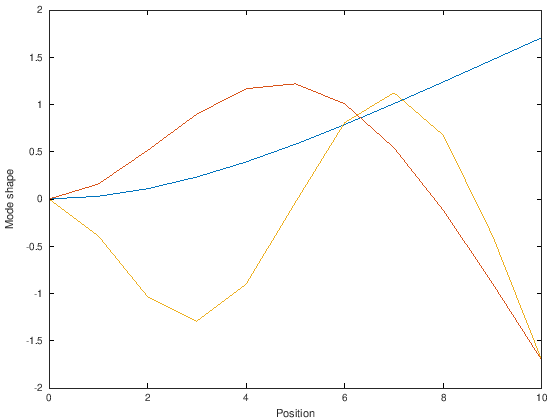

In [ ]:

%--------------- Full FEM matrices ------------------------------------------

n_dof_uc = 4;                     % number of degrees of freedom for a unit cell
n_dof_beam = (n_dof_uc-2)*n+2;    % number of degrees of freedom for the beam

K_full= zeros(n_dof_beam);        % start with empty matrices 
M_full= zeros(n_dof_beam);        

for id=1:n                        % fill the matrices depending on position of the element
    pos = (n_dof_uc-2)*(id-1)+1:(n_dof_uc-2)*id+2;             
    K_full(pos,pos)=K_full(pos,pos)+Km;
    M_full(pos,pos)=M_full(pos,pos)+Mm;
end

%--------------- Boundary conditions ------------------------------------------
   
% for a cantilever beam  
dofs_fixed = [1,2]';             % first displacement and rotation blocked

dofs_free=setdiff(1:n_dof_beam,dofs_fixed);   % keep only the free dof
K_tot = K_full(dofs_free,dofs_free);   
M_tot = M_full(dofs_free,dofs_free);


%--------------- Frequencies and mode shapes ------------------------------------------

[V,D] = eig(K_tot,M_tot);                     % compute the eigenproperties
[sortedD, I] = sort(diag(D)); 
freq_123 = sqrt(sortedD(1:3))/2/pi            % first three frequencies

vect_total = zeros(n_dof_beam,size(V,1));              
vect_total(dofs_free,1:size(V,1)) = V;         % mode shape vectors with all blocked dof 

disp_dof = 1:2:n_dof_beam;                     % displacement degrees of freedom
disp_vect = vect_total(disp_dof,:);            % all mode shape vectors in a matrix

plot([0:n_dof_beam/2-1],[disp_vect(:,find(I == 1))])     % plot mode shapes
hold on
plot([0:n_dof_beam/2-1],[disp_vect(:,find(I == 2))])
plot([0:n_dof_beam/2-1],[disp_vect(:,find(I == 3))])
xlabel('Position');
ylabel('Mode shape');
box on

#### Mechanical frequency response function
The mass and stiffness matrices can be used to compute the **frequency response** of the system to an external forcing $\mathbf{F_{tot}} $:
$$
\mathbf{M_{tot}} 
\mathbf{\ddot q_{tot}} 
+
\mathbf{K_{tot}}  
\mathbf{q_{tot}} 
=
\mathbf{F_{tot}}.
$$

#### *STEP #2: Plot frequency response functions and operational mode shapes for comparison with the previous results.*

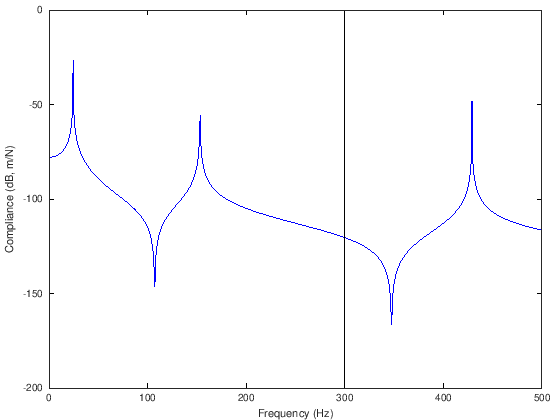

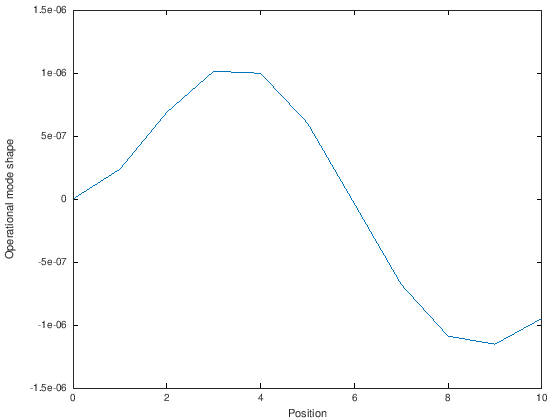

In [ ]:

%--------------- External excitation ---------------------------------

F_ext = zeros(size(K_tot,2),1);     % external force vector
F_ext(size(K_tot,2)-1)=1;           % unitary force applied at the free end of the beam


%--------------- Parameters for the frequency response functions ------------------

f_min = 1;                      % minimum frequency
f_max = 500;                    % maximum frequency
f_target = 300;                 % target frequency for operational mode shape
nb_pt = 1000;                   % number of frequency points

om_min = f_min*2*pi;            % minimum angular frequency
om_max = f_max*2*pi;            % maximum angular frequency
x = linspace(om_min,om_max,nb_pt);   % angular frequency vector
id_freq_sup = find(x>f_target*2*pi); 
id_freq = min(id_freq_sup);          % position of the target freq in the x vector


%--------------- Frequency loops ---------------------------------
   
disp = zeros(size(x,2),size(K_tot,1));  % displacement vectors of the beam 

for j=1:size(x,2)
    om = x(j);                                 % angular frequency
    disp(j,:) =  (K_tot-om^2*M_tot)\F_ext;     % solve for forced excitation
end

dof_free_end = size(K_tot,2)-1;                % select degree of freedom for frequency response

vect_total = zeros(n_dof_beam,size(disp,1));              
vect_total(dofs_free,1:size(disp,1)) = disp';  % mode shape vectors with all blocked dof 

disp_dof = 1:2:n_dof_beam;                     % displacement degrees of freedom
disp_vect = vect_total(disp_dof,:);            % all mode shape vectors in a matrix


plot(x/(2*pi),20*log10(abs(disp(:,dof_free_end))),'-b','Linewidth',2)  % plot frequency responce function
hold on
xlabel('Frequency (Hz)');
ylabel('Compliance (dB, m/N)');
y = ylim;
line([f_target f_target],[y(1) y(2)])
box on

figure
plot([0:n_dof_beam/2-1],[disp_vect(:,id_freq)])   % plot operational mode shape at target frequency
xlabel('Position');
ylabel('Operational mode shape');
box on



## Electrical Beam

<p align="center">
<img src="media/elec_beam.png" style="width:900px"></img>
</p>

<p align="center">
<img src="media/uc_elec.png" style="width:500px"></img>
</p>

#### Initial values for the electrical components

|       |                 |
|-----------------------------|-------------------------------|
| Piezoelectric capacitance   | $ C = 50.8  $ nF              |
| Inductance                  | $L = 0.247 $ H               |
| Transformer ratio           | $\hat a = 2$                  |
| Resistance (in inductor)    | $R_L = 0~\Omega $   |
| Resistance (in capacitor)   | $R_C =  0~\Omega $ |
| Resistance (in transformer) | $R_T = 838~\Omega $          |



In [ ]:
C = 50.8e-9;    % capacitance
L = 1;          % inductance
a_tild = 2;     % transformer ratio 
R_L= 0;         % resistance in series with inductance
R_C= 0;         % resistance in series with capacitance
R_T = 838;      % resistance in transformers
n = 10;         % number of unit cells in the network

#### Electrical stiffness, damping and mass matrices
Electrical charge displacement and voltage vectors are defined as:
$$
\mathbf{q_e} 
=
\left[ 
\begin{array}{cccc}
 {q_w}_{ \textrm{L}} \\
  {q_{\theta}}_{ \textrm{L}} \\
  {q_w}_{ \textrm{R}} \\
   {q_{\theta}}_{ \textrm{R}}
\end{array} \right]
\quad \textrm{and}  \quad
\mathbf{F_e} 
=
\left[ \begin{array}{cccc}
 {V_w}_{ \textrm{L}}\\
  {V_{\theta}}_{ \textrm{L}} \\
   -{V_w}_{ \textrm{R}} \\
    -{V_{\theta}}_{ \textrm{R}} 
\end{array} \right],
$$
where the electrical charge displacements ${q_w}$ and ${q_{\theta}}$ are the analogues of the transverse and angular mechanical displacements $W$ and $\theta$, whereas the opposite of the voltage contributions $V_w$ and $V_{\theta}$ are the analogues of the shear force and bending moment.

The objective is to express the dynamics of the unit cell into a classical formulation involving "mass", damping and "stiffness" matrices:
$$
\mathbf{M_e} 
\mathbf{\ddot q_e} 
+
\mathbf{C_e}  
\mathbf{\dot q_e} 
+
\mathbf{K_e}  
\mathbf{q_e} 
=
\mathbf{F_e},
$$
Symbolic computations based on the discrete equations describing the electrical unit cell give the **mass, damping and stiffness matrices for the electrical network**:
$$
\mathbf{M_e}
=
\dfrac{L}{2} \left[ 
\begin{array}{cccc} 1 & \hat a/2 & 0 & 0\\ \hat a/2 & \hat{a}^2/4 & 0 & 0\\ 0 & 0 & 1 & -\hat a/2\\ 0 & 0 & -\hat a/2 & \hat a^2/4 \end{array}\right],
$$
$$
\mathbf{C_e}
=
\dfrac{R_{L}}{2} \left[
\begin{array}{cccc} 1 & \hat a/2 & 0 & 0\\ \hat a/2 & \hat{a}^2/4 & 0 & 0\\ 0 & 0 & 1 & -\hat a/2\\ 0 & 0 & -\hat a/2 & \hat a^2/4 \end{array}\right]
+
\dfrac{R_{T}}{2} \left[
\begin{array}{cccc} 0 & 0 & 0 & 0\\ 0 & 1 & 0 & 0\\ 0 & 0 & 0 & 0\\ 0 & 0 & 0 & 1 \end{array}\right]
+
R_{C} \left[
\begin{array}{cccc} 0 & 0 & 0 & 0\\ 0 & 1 & 0 & -1\\ 0 & 0 & 0 & 0\\ 0 & -1 & 0 & 1 \end{array}\right]
$$
and
$$
\mathbf{K_e}
=
\dfrac{4}{\hat a^2 C_0 }
\left[
\begin{array}{cccc} 1 & \dfrac{\hat a}{2} & -1 & \dfrac{\hat a}{2}\\ \dfrac{\hat a}{2} & \dfrac{\hat a^2}{4 } \dfrac{ C + 2 C_0}{C +  C_0 }  & -\dfrac{\hat a}{2} & \dfrac{\hat a^2}{4 } \dfrac{ C}{C + C_0  } \\ -1 & -\dfrac{\hat a}{2} & 1 & -\dfrac{\hat a}{2}\\ \dfrac{\hat a}{2} & \dfrac{\hat a^2}{4 } \dfrac{ C}{C + C_0 } & -\dfrac{\hat a}{2} & \dfrac{\hat a^2}{4 } \dfrac{ C + 2 C_0}{C +  C_0 } \end{array}\right].
$$
$C_0$ is a numerical parameter that is required to relax some constrains in the electrical network. A value $C_0 = C \times 10^{-3}$ is adequate for the present calculations. 

In [ ]:

Cf = C*1e-3;   % numerical parameter for stiffness matrix

Ke=...       % electrical stiffness matrix
    4/a_tild^2/Cf*...
   [        1,                       a_tild/2,        -1,                       a_tild/2;...
     a_tild/2, (a_tild^2/4)*((C+2*Cf)/(C+Cf)), -a_tild/2,        (a_tild^2/4)*C/(C + Cf);...
           -1,                      -a_tild/2,         1,                      -a_tild/2;...
     a_tild/2,        (a_tild^2/4)*C/(C + Cf), -a_tild/2, (a_tild^2/4)*((C+2*Cf)/(C+Cf))];  
    

Me=...       % electrical mass matrix
    L/2*...   
    [        1 ,        a_tild/2,           0,              0;...
      a_tild/2 ,     a_tild^2/4 ,           0,              0;...  
              0,               0,          1 ,      -a_tild/2;...
              0,               0,  -a_tild/2 ,     a_tild^2/4];   
                                    
   
Ce=...       % electrical damping matrix;
    R_L/2*...   
    [        1 ,        a_tild/2,           0,              0;...
      a_tild/2 ,     a_tild^2/4 ,           0,              0;...  
              0,               0,          1 ,      -a_tild/2;...
              0,               0,  -a_tild/2 ,     a_tild^2/4]...
              +...      
    R_T/2*...   
    [        0 ,               0,           0,              0;...
             0 ,               1,           0,              0;...  
             0,               0,           0,              0;...
             0,               0,           0,              1]...
         +...      
    R_C*...   
    [        0 ,               0,           0,              0;...
             0 ,               1,           0,              -1;...  
             0,               0,           0,              0;...
             0,               -1,           0,              1];        
         

#### Electrical frequencies and mode shapes
Neglecting the damping matrix, the **eigenproperties** of the electrical beam can be computed after assembly of the global stiffness and mass matrices:
$$
\left[
\mathbf{K_{tot}} - \omega^ 2 \mathbf{M_{tot}}  
\right]  
\mathbf{q_{tot}} 
=
\mathbf{0}. 
$$

#### *STEP #3: Compute the first three natural frequencies and mode shapes of the electrical beam and find an inductance value offering a sufficient analogy with the mechanical beam.*

In [ ]:
%%% add code %%%

 added to session magics.



### Electrical frequency response function
The mass, damping and stiffness matrices can be used to compute the **frequency response** of the system to an external forcing $\mathbf{F_{tot}} $:
$$
\mathbf{M_{tot}} 
\mathbf{\ddot q_{tot}} 
+
\mathbf{C_{tot}}  
\mathbf{\dot q_{tot}} 
+
\mathbf{K_{tot}}  
\mathbf{q_{tot}} 
=
\mathbf{F_{tot}}.
$$

#### *STEP #4: Compare a frequency response function obtained with the electrical beam to its mechanical equivalent.*

In [ ]:
%%% add code %%%

%% removed from session magics.



## Electromechanical Beam

<p align="center">
<img src="media/electromechanical_beam.png" style="width:900px"></img>
</p>

#### Coupled model involving both mechanical and electrical degrees of freedom
In the case of a coupled system, the mechanical and electrical degrees of freedom can be combined thanks to the following matrix formulation: 
$$
\left[ 
\begin{array}{ccc}
\mathbf{M_m} & \mathbf{0} \\
\mathbf{0} & \mathbf{M_e} 
\end{array} \right] 
\left[ 
\begin{array}{ccc}
\mathbf{\ddot q_m} \\
\mathbf{\ddot q_e} 
\end{array} \right]
+
\left[ 
\begin{array}{ccc}
\mathbf{C_m} & \mathbf{0} \\
\mathbf{0} & \mathbf{C_e} 
\end{array} \right] 
\left[ 
\begin{array}{ccc}
\mathbf{\dot q_m} \\
\mathbf{\dot q_e} 
\end{array} \right]
+
\left[ 
\begin{array}{ccc}
\mathbf{K_m} + \frac{1}{C} \mathbf{K_c {K_c}^T} & \frac{1}{C}\mathbf{K_c S^T}  \\
\frac{1}{C}  \mathbf{S K_c ^T} & \mathbf{K_e} 
\end{array} \right]
\left[ 
\begin{array}{ccc}
\mathbf{q_m} \\
\mathbf{q_e} 
\end{array} \right]
=
\left[  
\begin{array}{ccc}
\mathbf{F_m} \\
\mathbf{F_e} 
\end{array} \right].
$$
$\mathbf{K_c}$ is a coupling vector, $C$ is the piezoelectric capacitance and $\mathbf{S}$ is is defined from 
$
q_{\textrm{I}}=\mathbf{S^T} \mathbf{q_e},
$
where $q_{\textrm{I}}$ is the electrical charge flowing through the piezoelectric patches.

Because the poling direction of the piezoelectric patches have been chosen so that coupling occurs for bending motion, the **coupling vector** is defined as
$$
\mathbf{K_c}= e_{\theta}
\left[ \begin{array}{cccc}
 0 & 1 & 0 & -1\\ 
\end{array} \right]^T,
$$
where $e_{\theta} = 5.3$ N.m/kV
is the piezoelectric coupling coefficient related to bending motion. 

Concerning the $\mathbf{S}$ matrix, refering to the drawing of the electrical unit cell, the relation between the external electric charge displacements and the charge on the electrodes of the piezoelectric patches $q_{\textrm{I}} = {q_{\theta}}_{\textrm{L}} - {q_{\theta}}_{\textrm{R}}$ gives
$$
 \mathbf{S} =
\left[ 
\begin{array}{cccc}
 0 & 1 & 0 & -1 \\
\end{array} \right]^T. 
$$

In [ ]:
e_th = 5.3e-3 ;        % global coupling coefficient
Kc=e_th*[0 1 0 -1]';   % coupling matrix

ndof = 4;              % number of degrees of freedom in the mechanical unit cell

K_coupled = [   Km+1/C*(Kc*Kc'),     1/C*Kc*[0, 1, 0, -1];...   % electromechanical stiffness matrix 
           1/C*[0;1;0;-1]*Kc',                        Ke];  
M_coupled = [Mm,zeros(ndof,4);zeros(4,ndof),Me];                     % electromechanical mass matrix 
C_coupled = [zeros(ndof,4),zeros(ndof,4);zeros(4,ndof),Ce];          % electromechanical damping matrix 
    

#### Permutation matrix
The matrices need to be reorganized to collect left and right degrees of freedom ($\mathbf{q_L}$ and $\mathbf{q_R}$) without separating mechanical and electrical ones:
$$
\left[ 
\begin{array}{ccc}
\mathbf{q_L} \\
\mathbf{q_R} 
\end{array} \right]
=
\left[ 
\begin{array}{ccc}
{W}_\textrm{L} \\
  {\theta}_\textrm{L} \\
  {q_w}_{ \textrm{L}} \\
  {q_{\theta}}_{ \textrm{L}} \\
   {W}_\textrm{R} \\
    {\theta}_\textrm{R} \\
  {q_w}_{ \textrm{R}} \\
   {q_{\theta}}_{ \textrm{R}}
\end{array} \right]
=
\left[ 
\begin{array}{cccc}
\mathbf{I} & \mathbf{0}  & \mathbf{0} & \mathbf{0}\\
\mathbf{0} & \mathbf{0} & \mathbf{I}  & \mathbf{0}\\
\mathbf{0} & \mathbf{I}  & \mathbf{0} & \mathbf{0}\\
\mathbf{0} & \mathbf{0} & \mathbf{0} & \mathbf{I}  
\end{array} \right] 
\left[ 
\begin{array}{ccc}
{W}_\textrm{L} \\
  {\theta}_\textrm{L} \\
   {W}_\textrm{R} \\
    {\theta}_\textrm{R} \\
{q_w}_{\textrm{L}} \\
  {q_{\theta}}_{\textrm{L}} \\
  {q_w}_{ \textrm{R}} \\
   {q_{\theta}}_{ \textrm{R}}
\end{array} \right].
$$
Using this permutation matrix on the previous matrices finally provides the one-dimensional **electromechanical finite element** that allows a classical assembly process.


In [ ]:
perm = zeros(ndof+4,ndof+4);     % build the permutation matrix        
perm(3:ndof,5:(ndof+2))=eye(ndof-2);   
perm(1,1)=1; perm(2,2)=1; perm(ndof+1,3)=1; perm(ndof+2,4)=1; perm(ndof+3,ndof+3)=1; perm(ndof+4,ndof+4)=1;  % permutation matrix to obtain the rearanged dynamic stiffness matrix
        
K_coupled=perm\K_coupled*perm;   % permutations to gather mechanical and electrical dofs
M_coupled=perm\M_coupled*perm;
C_coupled=perm\C_coupled*perm;


#### Frequency response function of the electromechanical beam
The mass, damping and stiffness matrices of the electromechanical system can be used to compute its **frequency response** to an external forcing $\mathbf{F_{tot}} $:
$$
\mathbf{M_{tot}} 
\mathbf{\ddot q_{tot}} 
+
\mathbf{C_{tot}}  
\mathbf{\dot q_{tot}} 
+
\mathbf{K_{tot}}  
\mathbf{q_{tot}} 
=
\mathbf{F_{tot}}.
$$

#### *STEP #5: Plot a frequency response fonction involving the mechanical displacement of the electromechanical beam and evaluate the influence of the electrical components used in the analogous network.*

In [ ]:
%%% add code %%%

 added to session magics.



<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=491f87a1-62a7-4e27-ac07-7611cab3bcf6' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>